## import modules

In [247]:
import yfinance as yf
import pandas as pd
import numpy as np

In [248]:
ticker = "MSFT"
df = yf.download(ticker)
df.drop(columns="Adj Close", inplace=True)
df.index = [d.strftime("%Y-%m-%d") for d in df.index]
df.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200


In [249]:
df["change_tomorrow"] = df["Close"].pct_change(-1)*100
# df.drop(columns="change_tomorrow", inplace=True)


In [250]:
df = df.dropna().copy()
df

Price,Close,High,Low,Open,Volume,change_tomorrow
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200,2.609539
1986-03-18,0.099826,0.103299,0.098958,0.102431,67766400,1.769803
1986-03-19,0.098090,0.100694,0.097222,0.099826,47894400,2.727102
...,...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046


In [251]:
# not using UP and DOWN but 1 and 0, this works better for the neural network used later
df["change_tomorrow_direction"] = df.change_tomorrow.apply(lambda v: 1 if v>0 else 0)
df

Price,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071,0
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774,0
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200,2.609539,1
1986-03-18,0.099826,0.103299,0.098958,0.102431,67766400,1.769803,1
1986-03-19,0.098090,0.100694,0.097222,0.099826,47894400,2.727102,1
...,...,...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111,0
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301,0
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046,0


<Axes: >

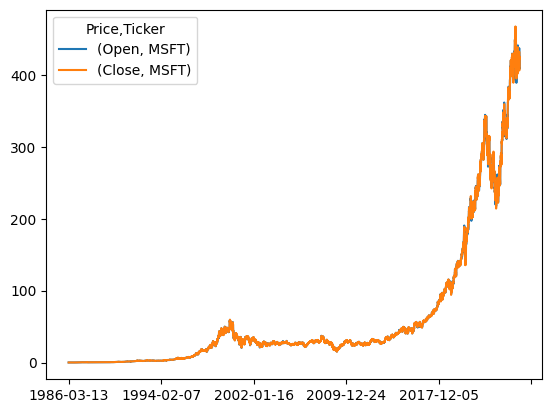

In [252]:
df[["Open","Close"]].plot()

## Normalizing the columns to have all values between -1 and 1

In [253]:
def normalize_column(column):
    try:
        max_val = column.max()
        min_val = column.min()
        abs_max = max(abs(max_val), abs(min_val))
        return column/abs_max
    except:
        return column

In [254]:
df_normal = df.apply(normalize_column)

<Axes: >

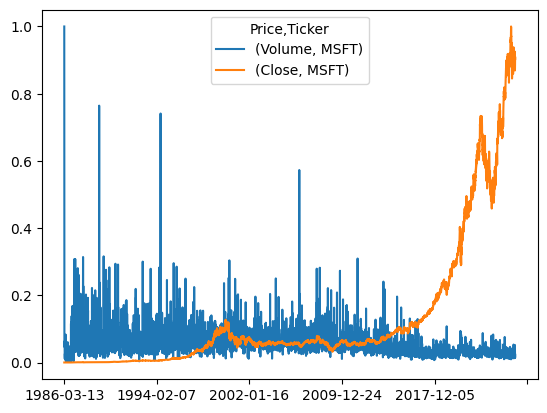

In [255]:
df_normal[["Volume","Close"]].plot()

## Training the model, all data

In [215]:
target = df.change_tomorrow_direction
training_data = df.drop(columns=["change_tomorrow","change_tomorrow_direction"])

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
model_dt = DecisionTreeClassifier(max_depth=16)
model_dt.fit(X=training_data, y=target)

DecisionTreeClassifier(max_depth=16)

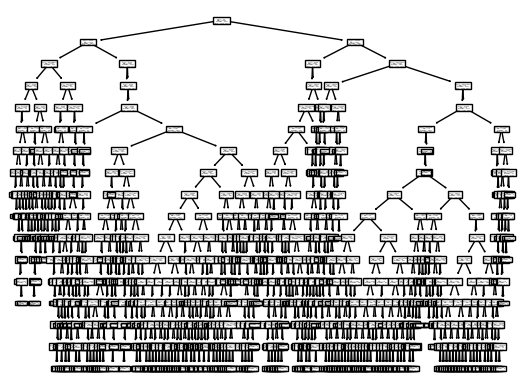

In [257]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt);

In [258]:
prediction = model_dt.predict(X=training_data)


In [259]:
df["prediction"]=prediction
df.tail(8)


Price,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction,prediction
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,
2024-10-30,432.529999,438.500000,432.100006,437.440002,29749100,6.442720,1,1
2024-10-31,406.350006,416.160004,406.299988,415.359985,53971000,-0.979601,0,0
2024-11-01,410.369995,415.500000,407.500000,409.010010,24230400,0.467611,1,0
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111,0,0
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301,0,0
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046,0,0
2024-11-07,425.429993,426.850006,419.880005,421.279999,19901800,0.683955,1,0
2024-11-08,422.540009,426.500000,421.779999,425.320007,16891400,1.083706,1,1


In [260]:
correct_prediction = df.prediction == df.change_tomorrow_direction
correct_prediction.sum()/len(correct_prediction)

0.6638957307060755

In [262]:
model_dt.score(X=training_data, y=target)

0.6638957307060755

## Now let's work with test and training sets

In [261]:
from sklearn.model_selection import train_test_split


In [223]:
X = df.drop(columns=["change_tomorrow","change_tomorrow_direction","prediction"])
y = df.change_tomorrow_direction

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8769
975
8769
975


In [227]:
model_dt_2 = DecisionTreeClassifier(max_depth=4)
model_dt_2.fit(X=X_train,y=y_train)


DecisionTreeClassifier(max_depth=4)

In [228]:
train_prediction = model_dt_2.predict(X_train)
correct = train_prediction==y_train
print(correct.sum()/len(correct))

0.5331280647736344


In [229]:
test_prediction = model_dt_2.predict(X_test)
correct = test_prediction==y_test
print(correct.sum()/len(correct))

0.522051282051282


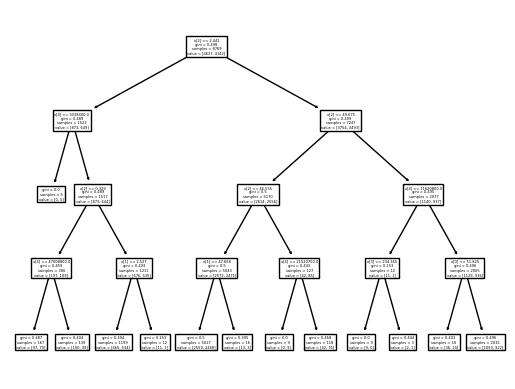

In [246]:
plot_tree(decision_tree=model_dt_2);

## Can I set up a neural network?

In [231]:
import tensorflow as tf
from tensorflow import keras


In [237]:
model_nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [238]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [243]:
model_nn.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/11
275/275 [==============================] - 1s 3ms/step - loss: 0.7116 - accuracy: 0.5155 - val_loss: 0.6949 - val_accuracy: 0.5159
Epoch 2/11
275/275 [==============================] - 1s 3ms/step - loss: 1097.1478 - accuracy: 0.5111 - val_loss: 6009.5601 - val_accuracy: 0.5159
Epoch 3/11
275/275 [==============================] - 1s 3ms/step - loss: 184.7623 - accuracy: 0.5084 - val_loss: 15.1560 - val_accuracy: 0.5159
Epoch 4/11
275/275 [==============================] - 1s 3ms/step - loss: 1.2469 - accuracy: 0.5011 - val_loss: 0.6975 - val_accuracy: 0.5159
Epoch 5/11
275/275 [==============================] - 1s 3ms/step - loss: 0.7068 - accuracy: 0.5184 - val_loss: 0.6928 - val_accuracy: 0.5159
Epoch 6/11
275/275 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5277 - val_loss: 0.6928 - val_accuracy: 0.5159
Epoch 7/11
275/275 [==============================] - 1s 3ms/step - loss: 0.7140 - accuracy: 0.5152 - val_loss: 0.7586 - val_accuracy: 0.48

In [244]:
train_loss, train_accuracy = model_nn.evaluate(X_train, y_train)
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')


31/31 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5159
Train accuracy: 0.527654230594635
Test accuracy: 0.5158974528312683
